#Section 19.1: Root Finding Problem Statement

The root or zero of a function, $f(x)$, is an xr such that $f(x_r)=0$. For functions such as $f(x)=x^2−9$, the roots are clearly 3 and −3. However, for other functions such as $f(x)=cos(x)−x$, determining an analytic, or exact, solution for the roots of functions can be difficult. For these cases, it is useful to generate numerical approximations of the roots of f and understand the limitations in doing so.

**Example**: Using $fsolve$ function from scipy to compute the root of $f(x)=cos(x)−x$ near −2. Verify that the solution is a root (or close enough).

In [ ]:
import numpy as np
from scipy import optimize

f = lambda x: np.cos(x) - x
r = optimize.fsolve(f, -2)
print("r =", r)

# Verify the solution is a root
result = f(r)
print("result=", result)

r = [0.73908513]
result= [0.]


**Example**: The function $f(x)=\frac{1}{x}$ has no root. Use the fsolve function to try to compute the root of $f(x)=\frac{1}{x}$. Turn on the full_output to see what’s going on. Remember to check the documentation for details.

In [ ]:
f = lambda x: 1/x

r, infodict, ier, mesg = optimize.fsolve(f, -2, full_output=True)
print("r =", r)

result = f(r)
print("result=", result)

print(mesg)

r = [-3.52047359e+83]
result= [-2.84052692e-84]
The number of calls to function has reached maxfev = 400.


We can see that, the value r we got is not a root, even though the f(r) is a very small number. Since we turned on the full_output, which have more information. A message will be returned if no solution is found, and we can see mesg details for the cause of failure - "The number of calls to function has reached $maxfev = 400$."

#Section 19.2: Tolerance

**Tolerance** is the level of error that is acceptable for an engineering application. We say that a computer program has converged to a solution when it has found a solution with an error smaller than the tolerance. When computing roots numerically, or conducting any other kind of numerical analysis, it is important to establish both a metric for error and a tolerance that is suitable for a given engineering/science application.

For computing roots, we want an $x_r$ such that $f(x_r)$ is very close to 0. Therefore $|f(x)|$ is a possible choice for the measure of error since the smaller it is, the likelier we are to a root. Also if we assume that $x_i$ is the $i^t$$^h$ guess of an algorithm for finding a root, then $|x_i$$_+$$_1$$−x_i|$ is another possible choice for measuring error, since we expect the improvements between subsequent guesses to diminish as it approaches a solution. As will be demonstrated in the following examples, these different choices have their advantages and disadvantages.

**Example**: Let error be measured by $e=|f(x)|$ and $tol$ be the acceptable level of error. The function $f(x)=x_2+tol/2$ has no real roots. However, $|f(0)|=tol/2$ and is therefore acceptable as a solution for a root finding program.

Let error be measured by $e=|x_i$$_+$$_1$$−x_i|$ and tol be the acceptable level of error. The function $f(x)=\frac{1}{x}$ has no real roots, but the guesses $x_i=−tol/4$ and $x_i$$_+$$_1=tol/4$ have an error of $e=tol/2$ and is an acceptable solution for a computer program.

Based on these observations, the use of tolerance and converging criteria must be done very carefully and in the context of the program that uses them.

#Section 19.3: Bisection Method


The **Intermediate Value Theorem** $f(x)$ is a continuous function between $a$ and $b$, and $sign(f(a))≠sign(f(b))$, then there must be a $c$, such that $a<c<b$ and $f(c)=0$. This is illustrated in the following figure.

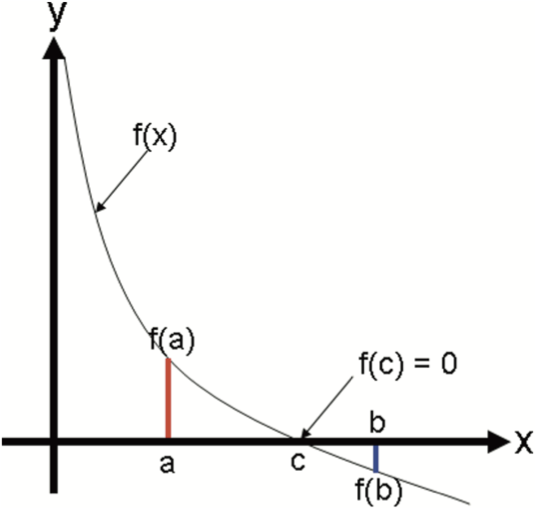

The **bisection method** uses the intermediate value theorem iteratively to find roots. Let $f(x)$ be a continuous function, and $a$ and $b$ be real scalar values such that $a<b$. Assume, without loss of generality, that $f(a)>0$ and $f(b)<0$. Then by the intermediate value theorem, there must be a root on the open interval $(a,b)$. Now let $m=\frac{b+a}{2}$, the midpoint between $a$ and $b$. If $f(m)=0$ or is close enough, then $m$ is a root. If $f(m)>0$, then m is an improvement on the left bound, $a$, and there is guaranteed to be a root on the open interval $(m,b)$. If $f(m)<0$, then m is an improvement on the right bound, $b$, and there is guaranteed to be a root on the open interval $(a,m)$. This scenario is depicted in the following figure.

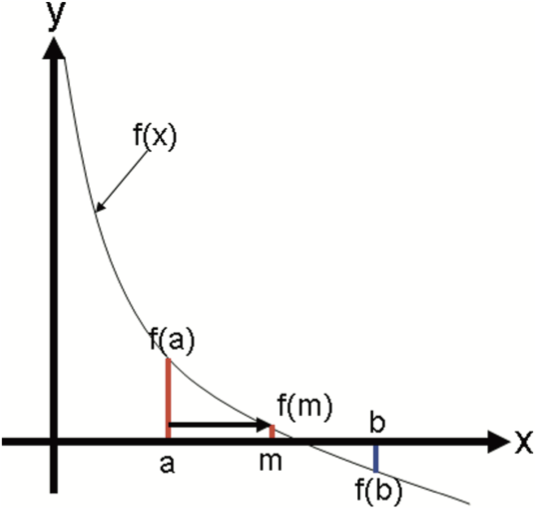

The process of updating a and b can be repeated until the error is acceptably low.

**Example**: Program a function my_bisection(f, a, b, tol) that approximates a root $r$ of $f$, bounded by $a$ and $b$ to within $|f(\frac{a+b}{2})|<tol$.

In [ ]:
import numpy as np

def my_bisection(f, a, b, tol): 
    # approximates a root, R, of f bounded 
    # by a and b to within tolerance 
    # | f(m) | < tol with m the midpoint 
    # between a and b Recursive implementation
    
    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")
        
    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

The $\sqrt{2}$ can be computed as the root of the function $f(x)=x_2−2$. Starting at $a=0$ and $b=2$, use my_bisection to approximate the $\sqrt{2}$ to a tolerance of $|f(x)|<0.1$ and $|f(x)|<0.01$. Verify that the results are close to a root by plugging the root back into the function.

In [ ]:
f = lambda x: x**2 - 2

r1 = my_bisection(f, 0, 2, 0.1)
print("r1 =", r1)
r01 = my_bisection(f, 0, 2, 0.01)
print("r01 =", r01)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))

r1 = 1.4375
r01 = 1.4140625
f(r1) = 0.06640625
f(r01) = -0.00042724609375


#Section 19.4: Newton-Raphson Method

Let $f(x)$ be a smooth and continuous function and $x_r$ be an unknown root of $f(x)$. Now assume that $x_0$ is a guess for xr. Unless $x_0$ is a very lucky guess, $f(x_0)$ will not be a root. Given this scenario, we want to find an $x_1$ that is an improvement on $x_0$ (i.e., closer to $x_r$ than $x_0$). If we assume that $x_0$ is "close enough" to $x_r$, then we can improve upon it by taking the linear approximation of $f(x)$ around $x_0$, which is a line, and finding the intersection of this line with the x-axis. Written out, the linear approximation of $f(x)$ around $x_0$ is $f(x)≈f(x_0)+f′(x_0)(x−x_0)$. Using this approximation, we find $x_1$ such that $f(x_1)=0$. Plugging these values into the linear approximation results in the equation

$0=f(x_0)+f′(x_0)(x_1−x_0),$

which when solved for $x_1$ is $x_1=x_0−\frac{f(x_0)}{f′(x_0)}.$

An illustration of how this linear approximation improves an initial guess is shown in the following figure.

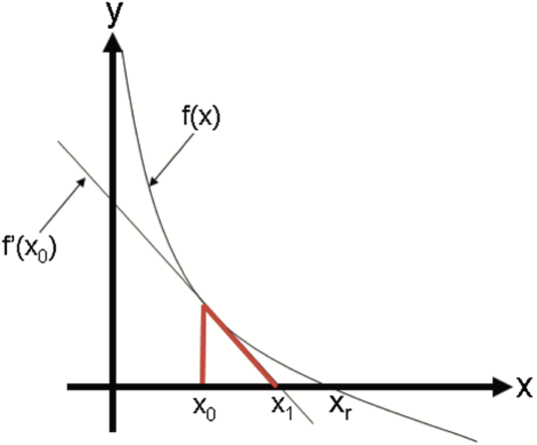

Written generally, a Newton step computes an improved guess, $x_i$, using a previous guess $x_i−1$, and is given by the equation

$x_i=x_i$$_−$$_1$$−\frac{g(x_i{_−}{_1})}{g′(x_i{_−}{_1})}.$

The Newton-Raphson Method of finding roots iterates Newton steps from x0 until the error is less than the tolerance.

**Example**: Find the root of the function $f(x)=x^2−2$ using $x_0=1.4$ as a starting point.

In [ ]:
import numpy as np

f = lambda x: x**2 - 2
f_prime = lambda x: 2*x
newton_raphson = 1.4 - (f(1.4))/(f_prime(1.4))

print("newton_raphson =", newton_raphson)
print("sqrt(2) =", np.sqrt(2))

newton_raphson = 1.4142857142857144
sqrt(2) = 1.4142135623730951


**Example**:  Write a function $my$_$newton(f,df,x0,tol)$, where the output is an estimation of the root of $f$, $f$ is a function object $f(x)$, $df$ is a function object to $f′(x)$, $x0$ is an initial guess, and $tol$ is the error tolerance. The error measurement should be $|f(x)|$.

In [ ]:
def my_newton(f, df, x0, tol):
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

Use my_newton to compute $\sqrt{2}$ to within tolerance of $1e-6$ starting at $x0 = 1.5$.

In [ ]:
estimate = my_newton(f, f_prime, 1.5, 1e-6)
print("estimate =", estimate)
print("sqrt(2) =", np.sqrt(2))

estimate = 1.4142135623746899
sqrt(2) = 1.4142135623730951


**Note**: If $x_0$ is close to $x_r$, then it can be proven that, in general, the Newton-Raphson method converges to xr much faster than the bisection method. However since $x_r$ is initially unknown, there is no way to know if the initial guess is close enough to the root to get this behavior unless some special information about the function is known a priori (e.g., the function has a root close to $x=0$). In addition to this initialization problem, the Newton-Raphson method has other serious limitations. For example, if the derivative at a guess is close to 0, then the Newton step will be very large and probably lead far away from the root. Also, depending on the behavior of the function derivative between $x_0$ and $x_r$, the Newton-Raphson method may converge to a different root than $x_r$ that may not be useful for our engineering application.

**Example**: Write a function my_fixed_point$(f,g,tol,max_iter)$, where f and g are function objects and $tol$ and max_iter are strictly positive scalars. The input argument, max_iter, is also an integer. The output argument, $X$, should be a scalar satisfying $|f(X)−g(X)|<tol$; that is, $X$ is a point that (almost) satisfies $f(X)=g(X)$. To find $X$, you should use the Bisection method with error metric, $|F(m)|<tol$. The function my_fixed_point should “give up” after max_iter number of iterations and return $X=[]$ if this occurs.

In [ ]:
def my_fixed_point(f,g,x0,tol,max_iter):
  xn = x0
  for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < tol:
            print('Solution found after',n,'iterations.')
            return xn
        gxn = g(xn)
        if gxn == 0:
            print('No derivative. No solution found.')
            return None
        xn = xn - fxn/gxn
  print('Maximum iterations. No solution found.')
  return None

In [ ]:
f = lambda x: x**3 - x**2 - 1
g = lambda x: 3*x**2 - 2*x
my_fixed_point(f,g,1,1e-10,100)

Solution found after 6 iterations.


1.4655712318767877

In [ ]:
f = lambda x: 5*x**3-4*x**2-3*x+9
g = lambda x: 15*x**2-8*x-3
my_fixed_point(f,g,1,1e-10,100)

Solution found after 6 iterations.


-1.1326897151456128

#Section 19.5: Root Finding in Python

Python has the existing root-finding functions for us to use to make things easy. The function we will use to find the root is $fsolve$ from the $scipy.optimize$.

**Example**: Compute the root of the function $f(x)=5x_3−4x_2−3x+9$ using $fsolve$.

In [ ]:
from scipy.optimize import fsolve
f = lambda x: 5*x**3-4*x**2-3*x+9
fsolve(f, [1, 1])

array([-1.13268972, -1.13268972])